# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculationsGeneration(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

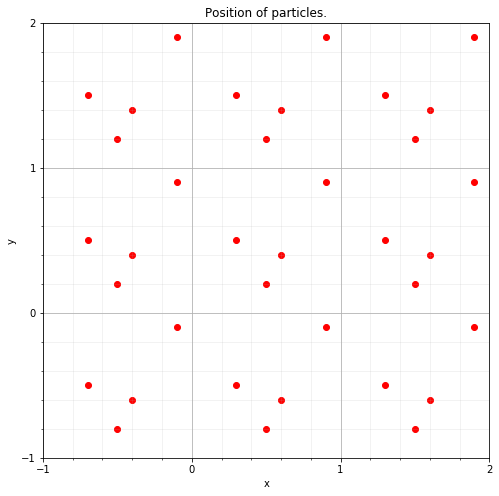

11486539.900954507

In [4]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [5]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

In [6]:
def potentialEnergyPerTrioExperimental(lengths, E0=1, Rc=1):
    """
    """
    Mc = 1/(3*(2**(2/3)*np.sqrt(3)))
    A0 = 4
    
    a = Mc * lengths[0] / Rc
    b = Mc * lengths[1] / Rc
    c = Mc * lengths[2] / Rc
    
    s = (a + b + c) / 2
    area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    longRangePotential = -area2Triangle * ((a + b + c)**-10)
    shortRangePotential = longRangePotential**2
    
    return E0 * A0 * (shortRangePotential + longRangePotential)

-0.9999020484832781
-0.0009763240814208968


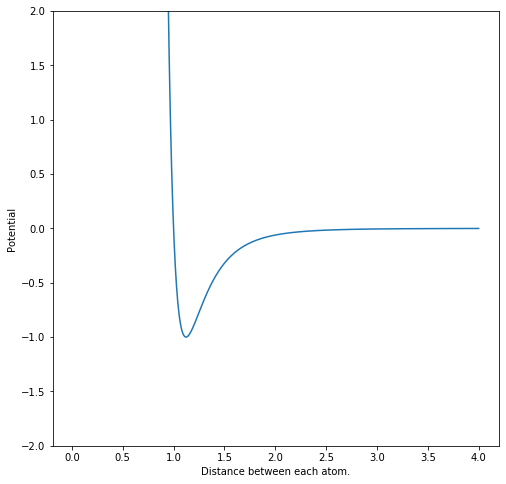

In [7]:
yCoordinates = np.linspace(0.01, 4, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate, yCoordinate, yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-2, 2)
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance between each atom.')
ax.set_ylabel('Potential')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

-74.09599601149688
259.09835896969315


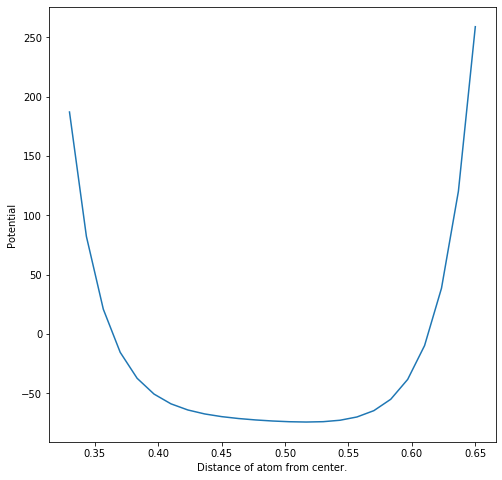

In [19]:
widthOfCell = 2
yCoordinates = np.linspace(0.33*widthOfCell/2, 0.65*widthOfCell/2, 25, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    particles = [np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 - yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 - yCoordinate])]
    otherSpace = generateSpace(particles, 4, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of atom from center.')
ax.set_ylabel('Potential')
print(min(results))
print(max(results))

## Checking convergence

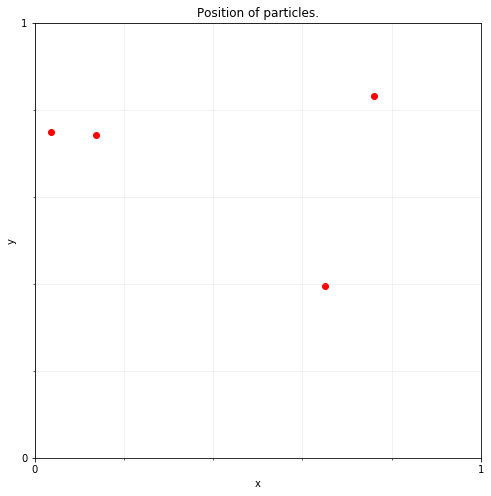

856.4334011593086
47243.17337814974
47104.81328721555
47064.393992013946
47047.917140135
47039.62586315156
47034.87351598378
47031.89820023318
47029.912541573365
47028.52159450834
47027.50949431371
47026.750144765996


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

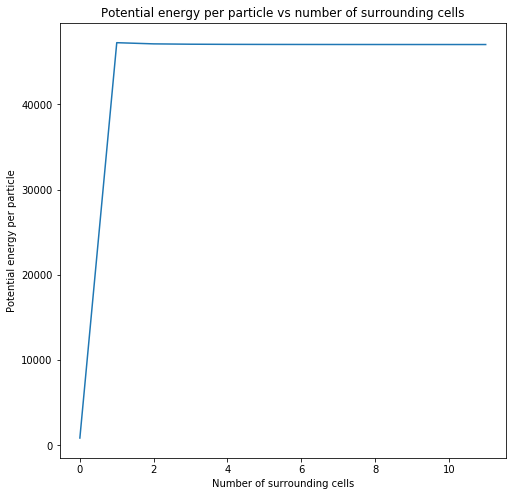

In [9]:
numberOfSurroundingCells = [i for i in range(0,12)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [np.array([random.uniform(0, widthOfCell), random.uniform(0, widthOfCell)]) for j in range(0, 4)]

plotLattice(atoms, widthOfCell)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
1212996.6586265177
1224471.1003350776
1224333.1647796102
1224293.2539946004
1224276.9042199792
1224268.6540627747
1224263.9180306562
1224260.950194652
1224258.9683481406


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

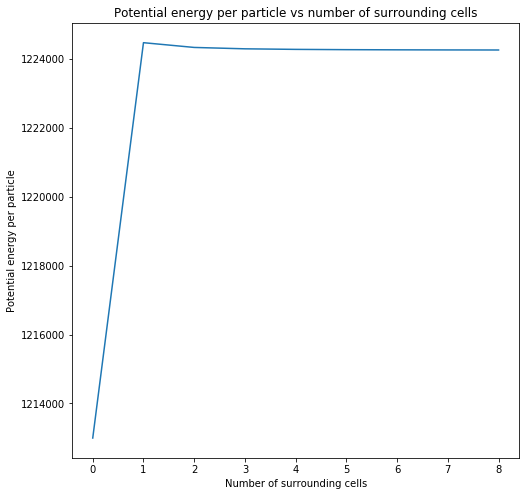

In [10]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
278.73982820331923
267.18877565740524
264.87190824439745
264.2464388979882
263.99086669681355
263.8619452548537
263.7879424374429
263.74156944320555
263.7106029281492


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

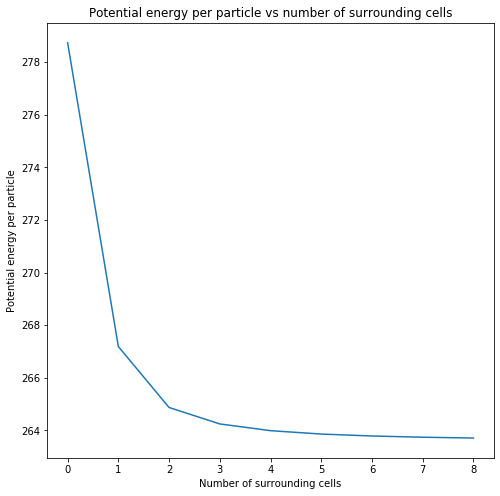

In [11]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 2.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.2038535053280258
-0.4309303039561149
-0.4671708163563449
-0.4769442298086936
-0.4809375715684424
-0.4829519722083611
-0.4841082667957223
-0.48483284496658685
-0.4853166968042177


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

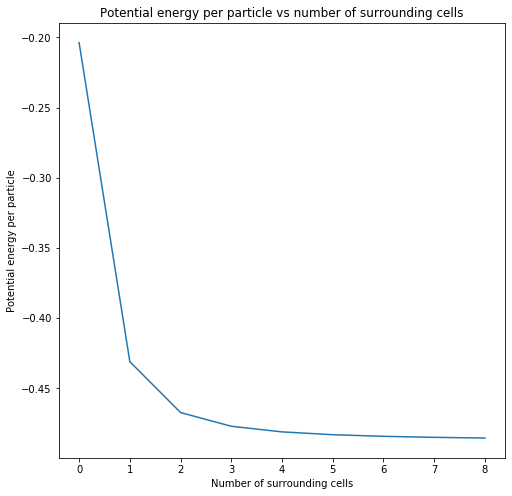

In [12]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))

[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.0042982880034176125
-0.007857737884959574
-0.008424005524775655
-0.008576715221031813
-0.008639111192403912
-0.008670586203161489
-0.008688653306227041
-0.008699974840179953
-0.008707535025152573


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

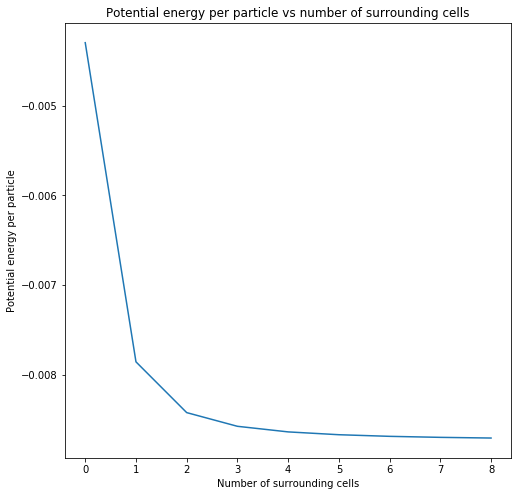

In [13]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 8.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 8.60590934753418e-05, 0.0002800641059875488, 0.00048410701751708983, 0.0007602057456970215, 0.0011493110656738282, 0.0015975313186645508, 0.0021314477920532228, 0.002748380184173584, 0.0034359827041625978, 0.004208032131195068]


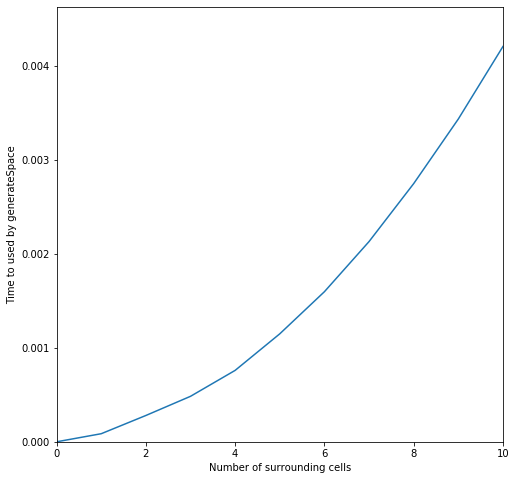

In [14]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [15]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

19.6 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Calculating with 0 surrounding cells.
0.00033354759216308594
Calculating with 1 surrounding cells.
0.036404927571614586
Calculating with 2 surrounding cells.
0.29303916295369464
Calculating with 3 surrounding cells.
1.1539030869801838
Calculating with 4 surrounding cells.
3.2469433148701987
Calculating with 5 surrounding cells.
7.23989733060201
Calculating with 6 surrounding cells.
14.467283328374227
Calculating with 7 surrounding cells.
25.39751450220744
Calculating with 8 surrounding cells.
42.27729630470276
Calculating with 9 surrounding cells.
65.04652102788289
Calculating with 10 surrounding cells.
97.17849508921306

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.00033354759216308594, 0.036404927571614586, 0.29303916295369464, 1.1539030869801838, 3.2469433148701987, 7.23989733060201, 14.467283328374227, 25.39751450220744, 42.27729630470276, 65.04652102788289, 97.17849508921306]
[5.9999999999999995e-05, 0.0327, 0.2823, 1.1175, 3.0912599999999997, 6.94086, 13.5879, 24.138299999999997, 39.882

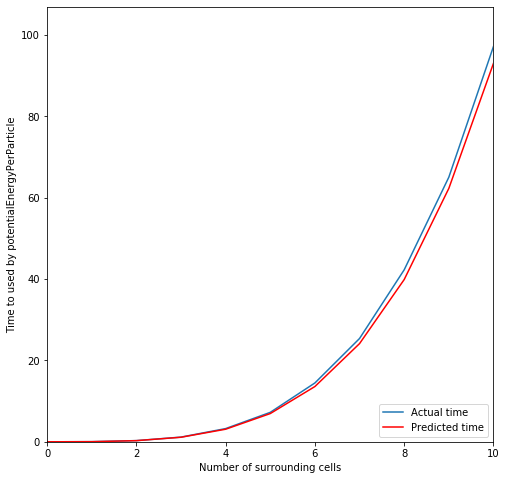

In [16]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

In [17]:
def test(listVectors):
    vectorA = listVectors[0]
    vectorB = listVectors[1]
    diffrences = vectorA - vectorB
    sum = math.pow(diffrences.dot(diffrences), -1)
    

%timeit test([np.array([1, 0]), np.array([1.0, 2])])

6.54 µs ± 410 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
